# Latar Belakang
Airbnb adalah jaringan pasar daring dan penginapan rumahan sejawat yang memungkinkan pengguna mendaftarkan atau menyewa properti untuk digunakan dalam jangka pendek. Harga sewanya ditetapkan oleh pemilik properti. Melalui analisa harga properti Airbnb di Bangkok menjadi wawasan bagi pemilik properti dalam menentukan harga yang kompetitif, memahami kebutuhan pasar, serta merancang strategi yang lebih efektif dalam pengelolaan properti untuk meningkatkan pendapatan penyewaan properti Airbnb di Bangkok

# Pernyataan Masalah
Pemilik properti Ingin **meningkatkan pendapatan dan daya tarik properti Airbnb di Bangkok**. 

Sebagai seorang data scientist, saya akan menjawab pertanyaan berikut:

**Bagaimana meningkatkan pendapatan dan daya tarik properti Airbnb di Bangkok?**

## Analisis yang Diperlukan

- **Analisis Harga Properti Berdasarkan Lokasi**:

Mengidentifikasi lokasi-lokasi dengan harga properti tinggi dan rendah untuk menyesuaikan harga secara cerdas.
- **Pengaruh Tipe Kamar (Room Type) terhadap Harga**:

Memahami perbedaan harga antar jenis kamar untuk menawarkan diversifikasi yang lebih baik kepada calon penyewa.
- **Ketersediaan Properti dan Harga**:

Menganalisis hubungan antara ketersediaan properti sepanjang tahun dengan harga untuk menentukan kebijakan pemesanan yang lebih optimal.

- **Faktor-Faktor yang Mempengaruhi Popularitas Properti**:

Mengetahui faktor-faktor yang paling memengaruhi jumlah ulasan untuk meningkatkan popularitas properti.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

## Load Dataset

In [31]:
# Melakukan import Library
import pandas as pd

df = pd.read_csv('Airbnb Listings Bangkok.csv')
df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


## Data Information

| Nama Kolom                           | Deskripsi                                                                                                                                              |
|--------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Unnamed: 0                           | Index dari dataset                                                                                                                                     |
| id                                   | Primary key untuk baris tempat tersebut.                                                                                                              |
| name                                 | Nama dari listing.                                                                                                                                     |
| host_id                              | Primary key untuk pemilik/tuan rumah.                                                                                                     |
| host_name                            | Nama tuan rumah/host                                                                                                         |
| neighborhood                         | Lingkungan/wilayah tempat listing berada berdasarkan latitude dan longitude.                                                                             |
| Latitude                             | Garis untuk koordinat lintang.                                                                              |
| Longitude                            | Garis untuk koordinat bujur.                                                                                |
| room_type                            | Tipe ruangan ('Entire home/apt', 'Private room', 'Hotel room', 'Shared room')                                                 |
| price                                | Harga sewa                                                                                                     |
| minimum_nights                       | Jumlah minimum masa sewa permalam.                                                                          |
| number_of_reviews                    | Jumlah ulasan yang dimiliki tempat sewa.                                                                                                                     |
| last_review                          | Tanggal terakhir ulasan.                                                                                                                         |
| reviews_per_month                    | Jumlah rata-rata ulasan setiap bulan.                                                                     |
| calculated_host_listings_count       | Jumlah tempat yang dimiliki pemilik.                                                                  |
| available_365                        | Ketersediaan tempat selama 365 hari ke depan.                                                                                                            |
| number_of_reviews_ltm                | Jumlah ulasan yang dimiliki tempat selama 12 bulan terakhir.                                                                                           |


In [32]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

# Data Cleaning

## Menampilkan Informasi Terkait DataFrame

In [33]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [34]:
print('Melihat jumlah baris dan kolom di dataset Airbnb')
print(f'baris di dataset Airbnb {df.shape[0]}')
print(f'kolom di dataset Airbnb {df.shape[1]}')
print('Melihat informasi dataset')
df.info()

Melihat jumlah baris dan kolom di dataset Airbnb
baris di dataset Airbnb 15854
kolom di dataset Airbnb 17
Melihat informasi dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15854 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights        

## Descriptive Statistic

In [35]:
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


## Menangani missing value

In [36]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [37]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

berdasarkan proporsi missing value diatas

- Missing Value:
  - kurang dari 10%
    - *name* : 5.04%
    - *host_name* : 0.6%
  - lebih dari 10%
    - *last_review* : 36.52%
    - *reviews_per_month* : 36.52%


**Menangani missing value pada dataset**

Pada dataset ini kita akan melakukan dua penanganan yaitu mengisi data dan menghapus baris.
pada pengisian data kita akan mengisi secara domain knowledge dan secara statistik menggunakan median (numerik) atau modus (untuk kolom kategori).

### Menangani Missing Value pada kolom `name`

In [38]:
df[df['name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [39]:
df[df['host_name']=='Pakaphol']

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [40]:
df.loc[2075, 'name'] = "Errday Guest House"

In [41]:
df[df['host_name']=='Pakaphol']

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,2075,13142743,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [42]:
df[df['name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0


In [43]:
# Menghapus baris dari ke 7 data missing value
df = df.dropna(subset=['name'])
df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

### Menangani Missing Value pada kolom `host_name`

In [44]:
df[df['host_name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [45]:
# Menghapus nilai kosong pada kolom 'host_name'
df = df.dropna(subset=['host_name'])
df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

### Menangani missing value pada kolom `last_review`

In [46]:
df[df['last_review'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [47]:
# Convert 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Check the dtype after conversion
print(df['last_review'].dtype)

datetime64[ns]


In [48]:
df['last_review'].fillna('0-0-0000', inplace= True)

In [49]:
df_plot = df.groupby(by='room_type')[['price']].sum().reset_index()
df_plot

,room_type,price
0,Entire home/apt,30881885
1,Hotel room,1965373
2,Private room,17672353
3,Shared room,481033


### Menangani missing value pada kolom `reviews_per_month`

In [50]:
df[df['reviews_per_month'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0-0-0000,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0-0-0000,NaN,1,365,0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0-0-0000,NaN,3,365,0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,0-0-0000,NaN,1,365,0
14,14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,0-0-0000,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0-0-0000,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0-0-0000,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0-0-0000,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0-0-0000,NaN,14,365,0


In [51]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df.isna().sum()

Unnamed: 0                        0
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### Menangani missing value pada kolom `Unnamed: 0`

In [52]:
df.drop(columns="Unnamed: 0", inplace=True)
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### **Penanganan missing value secara keseluruhan**

**Pengisian**

- Penanganan pada kolom ***last_review*** dan ***reviews_per_month***:
Karena missing value melebihi 10% maka perlu diisi datanya dengan tanggal kosong `0-0-0000` untuk kolom ***last_review*** dan rata-rata nya 0 untuk kolom ***reviews_per_month***.

**Penghapusan data**

- Drop column pada kolom ***unnamed: 0*** dilakukan karena memiliki nilai yang sama dengan `index` dataframe

- Mengisi kolom name berdasarkan kolom ***calculated_host_listings_count*** dan ***host_name*** karena jika ***calculated_host_listings_count*** memiliki nilai lebih dari 1 maka seharusnya terdapat baris dengan ***host_name*** yang memiliki nilai ***Pakaphol*** mempunyai lebih dari 1 baris dengan kolom ***name*** yang sama yaitu `Errday Guest House`. Jika ***calculated_host_listings_count*** memiliki nilai 1 akan kita drop karena tidak dapat diisi berdasarkan kolom ***calculated_host_listings_count*** dan ***host_name***.  
- Baris pada kolom ***host_name*** dilakukan penghapusan karena tidak dapat diisi berdasarkan baris/kolom manapun

## Check Duplicate

In [53]:
df.duplicated().sum()

0

Setelah di check tidak terdapat duplikasi data pada dataset ini

# Data Visualization

## Range `price` 

tujuan ini untuk mengecek range harga sewa dari minimum dan maximum.

serta mengecek lowerbound dan upperbound pada kolom price yang nantinya akan kita gunakan untuk mengecek outliers pada analisis

In [54]:
minPrice = df['price'].min()
maxPrice = df['price'].max()


print(f'Minimum price pada dataset ini adalah {minPrice}')

print(f'Maximum price pada dataset ini adalah {maxPrice}')

Minimum price pada dataset ini adalah 0
Maximum price pada dataset ini adalah 1100000


In [55]:
df[df['price'] == minPrice]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,0-0-0000,0.0,1,0,0


Terdapat minimum harga sewa yang memiliki nilai 0 yang dimiliki pada tempat *Somerset Maison Asoke* yang kemungkinan terjadi kesalahan input karena tidak mungkin tempat disewakan secara gratis

In [56]:
from scipy.stats import iqr
q3 = df['price'].describe()['75%']
print(f'Q3 = {q3}')
q1 = df['price'].describe()['25%']
print(f'Q1 = {q1}')
lowerbound = q1 - (iqr(df['price'])*1.5)
print(f'Lowerbound = {lowerbound}')
upperbound = q3 + (iqr(df['price'])*1.5)
print(f'Upperbound = {upperbound}')

Q3 = 2429.0
Q1 = 900.0
Lowerbound = -1393.5
Upperbound = 4722.5


Karena lowerbound bernilai negative dan nilai minimum price tidak ada yang dibawah lowerbound, maka kita akan menggunakan upperbound saja

In [57]:
outliers = len(df[df['price'] > upperbound])
total = len(df)
print(outliers/total)

0.08847100397551587


C:\Users\OWNER\AppData\Local\Temp\ipykernel_7300\534020295.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=top_5_neighbourhoods, y='neighbourhood', x='price', ci=0)


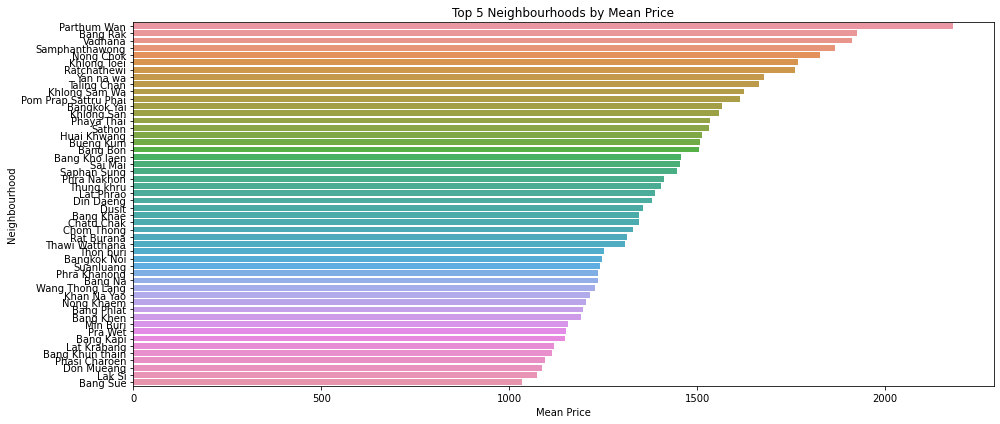

In [83]:
top_5_neighbourhoods = df[df['price'] < upperbound].groupby('neighbourhood')[['price']].mean().sort_values(by='price',ascending=False).reset_index()

# Visualisasi 5 Neighbourhoods teratas berdasarkan Median Price
plt.figure(figsize=(16, 6))
sns.barplot(data=top_5_neighbourhoods, y='neighbourhood', x='price', ci=0)
plt.title('Top 5 Neighbourhoods by Mean Price')
plt.ylabel('Neighbourhood')
plt.xlabel('Mean Price')
plt.tight_layout()
plt.show()

In [76]:
top_5_neighbourhoods

neighbourhood
Bang Phlat              92720.000000
Bang Kapi               51407.200000
Khlong San              44057.370370
Huai Khwang             43690.351064
Bang Khen               39973.333333
Din Daeng               34082.000000
Thon buri               31721.444444
Ratchathewi             30940.145455
Khlong Toei             26548.852381
Chatu Chak              21366.423077
Bang Sue                20027.900000
Pra Wet                 16429.571429
Vadhana                 16223.617801
Sathon                  15407.319149
Phasi Charoen           15300.000000
Min Buri                15000.000000
Parthum Wan             14713.544304
Bang Na                 14658.714286
Yan na wa               14036.500000
Khan Na Yao             13750.000000
Bang Khun thain         13142.500000
Bueng Kum               12452.000000
Bang Rak                12440.966292
Suanluang               11289.962963
Chom Thong              11051.400000
Dusit                   10283.166667
Khlong Sam Wa           

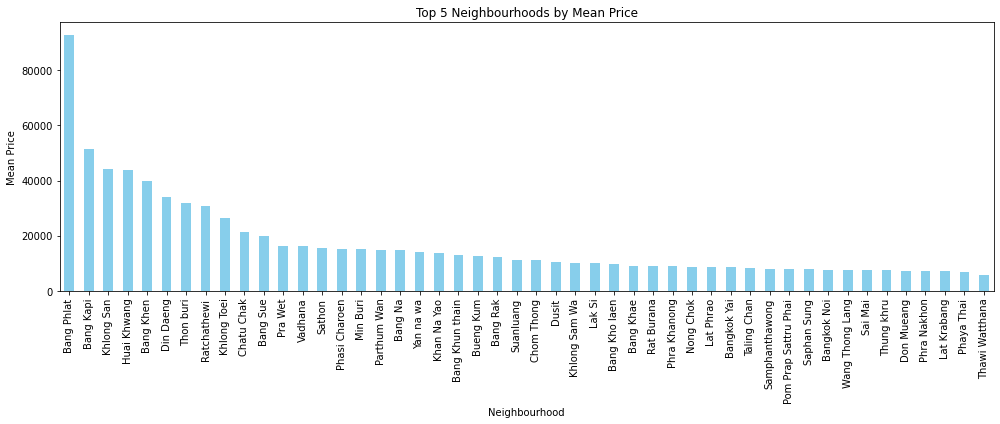

In [75]:
top_5_neighbourhoods = df[df['price'] >= upperbound].groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# Visualisasi 5 Neighbourhoods teratas berdasarkan Median Price
plt.figure(figsize=(14, 6))
plot=top_5_neighbourhoods.plot(kind='bar', color='skyblue')
plt.title('Top 5 Neighbourhoods by Mean Price')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Price')
# plt.xticks(rotation=45) 
# # Anotasi harga pada setiap bar
# for i, v in enumerate(top_5_neighbourhoods):
#     plot.text(i, v + 10, f'${v:.2f}', ha='center', va='bottom', fontsize=18)
plt.tight_layout()
plt.show()

## Analisis Harga Properti Berdasarkan Lokasi:

In [60]:
# Analisis Harga Properti Berdasarkan Lokasi (Neighbourhood)
neighbourhood_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

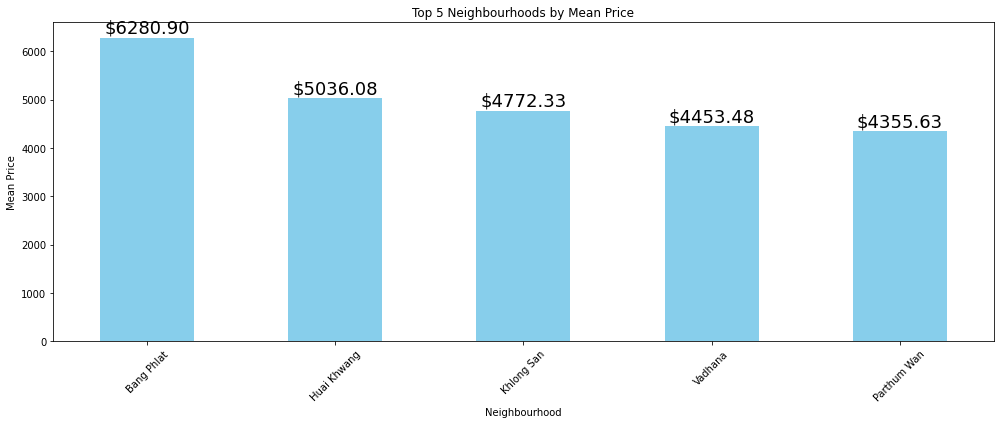

In [61]:
top_5_neighbourhoods = neighbourhood_price.head(5)

# Visualisasi 5 Neighbourhoods teratas berdasarkan Median Price
plt.figure(figsize=(14, 6))
plot=top_5_neighbourhoods.plot(kind='bar', color='skyblue')
plt.title('Top 5 Neighbourhoods by Mean Price')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
# Anotasi harga pada setiap bar
for i, v in enumerate(top_5_neighbourhoods):
    plot.text(i, v + 10, f'${v:.2f}', ha='center', va='bottom', fontsize=18)
plt.tight_layout()
plt.show()

## Pengaruh Tipe Kamar (Room Type) terhadap Harga:

In [84]:
roomtype_price = df.groupby('room_type')['price'].mean().sort_values(ascending=False)

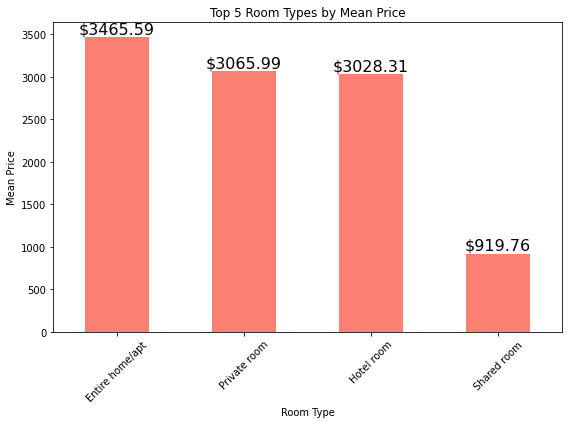

In [87]:
# Analisis Pengaruh Tipe Kamar terhadap Harga
top_5_roomtypes = roomtype_price.head(5)

# Visualisasi 5 Room Types teratas berdasarkan Median Price
plt.figure(figsize=(8, 6))
plot=top_5_roomtypes.plot(kind='bar', color='salmon')
plt.title('Top 5 Room Types by Mean Price')
plt.xlabel('Room Type')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
# Anotasi harga pada setiap bar
for i, v in enumerate(top_5_roomtypes):
    plot.text(i, v + 10, f'${v:.2f}', ha='center', va='bottom', fontsize=16)
plt.tight_layout()
plt.show()

## Ketersediaan Properti dan Harga:

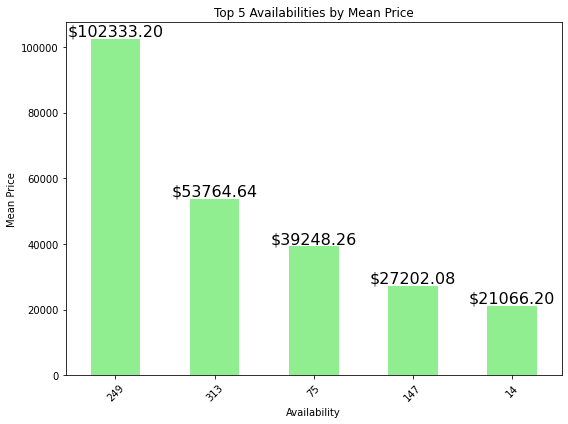

In [90]:
# Analisis Ketersediaan Properti dan Harga
availability_price = df.groupby('availability_365')['price'].mean().sort_values(ascending=False)
top_5_availabilities = availability_price.head(5)

# Visualisasi 5 Availability teratas berdasarkan Median Price
plt.figure(figsize=(8, 6))
plot = top_5_availabilities.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Availabilities by Mean Price')
plt.xlabel('Availability')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
# Anotasi harga pada setiap bar
for i, v in enumerate(top_5_availabilities):
    plot.text(i, v + 10, f'${v:.2f}', ha='center', va='bottom', fontsize=16)
plt.tight_layout()
plt.show()


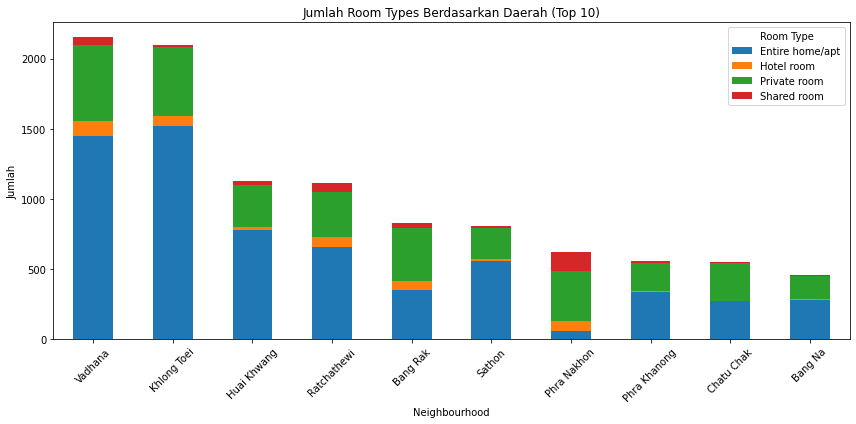

In [64]:
# # Membuat tabel silang (crosstab) antara 'neighbourhood' dan 'room_type'
# room_types_by_neighbourhood = pd.crosstab(df['neighbourhood'], df['room_type'])

# # Menambahkan kolom untuk total room types per daerah
# room_types_by_neighbourhood['Total'] = room_types_by_neighbourhood.sum(axis=1)

# # Mengurutkan berdasarkan room types terbanyak
# room_types_by_neighbourhood_sorted = room_types_by_neighbourhood.sort_values(by='Total', ascending=False)

# # Mengambil 10 daerah dengan jumlah room types terbanyak untuk divisualisasikan
# top_10_room_types = room_types_by_neighbourhood_sorted.head(10)
# # Membuat bar plot
# top_10_room_types.drop('Total', axis=1).plot(kind='bar', stacked=True, figsize=(12, 6))
# plt.title('Jumlah Room Types Berdasarkan Daerah (Top 10)')
# plt.xlabel('Neighbourhood')
# plt.ylabel('Jumlah')
# plt.xticks(rotation=45)
# plt.legend(title='Room Type')
# plt.tight_layout()
# plt.show()

In [65]:
# top_10_room_types

room_type,Entire home/apt,Hotel room,Private room,Shared room,Total
neighbourhood,,,,,
Vadhana,1451,105,542,53,2151
Khlong Toei,1520,73,489,15,2097
Huai Khwang,776,25,301,23,1125
Ratchathewi,656,70,326,61,1113
Bang Rak,351,67,375,34,827
Sathon,557,15,220,17,809
Phra Nakhon,56,77,355,131,619
Phra Khanong,336,9,200,12,557
Chatu Chak,273,2,266,7,548


Jika diasumsikan kolom price tidak terdistribusi normal, kita dapat mengambil beberapa insight dari analisis yang dilakukan:

- Analisis Harga Properti Berdasarkan Lokasi:

  - Perbedaan Harga Antar Lokasi: Terdapat perbedaan signifikan dalam harga properti antar lokasi. Pada beberapa daerah tertentu, harga properti cenderung lebih tinggi daripada daerah lainnya. Median harga properti di setiap lokasi dapat memberikan gambaran yang lebih akurat tentang tingkat harga properti yang umum di setiap daerah.
  - Identifikasi Lokasi Premium: Analisis ini dapat membantu mengidentifikasi lokasi-lokasi premium atau yang memiliki harga properti lebih tinggi dari rata-rata kota tersebut. Ini dapat memberikan wawasan bagi pembeli atau investor yang ingin menargetkan lokasi tertentu.
- Pengaruh Tipe Kamar (Room Type) terhadap Harga:

  - Perbedaan Harga Antar Tipe Kamar: Tipe kamar (misalnya, entire home/apt, private room, hotel room, shared room) memiliki pengaruh yang signifikan terhadap harga properti. Dengan menganalisis median harga untuk setiap tipe kamar di berbagai lokasi, kita dapat melihat perbedaan harga yang ditawarkan oleh masing-masing tipe kamar.
  - Preferensi Pengunjung: Analisis ini juga dapat membantu memahami preferensi pengunjung atau pelanggan tertentu terhadap tipe kamar dan seberapa jauh mereka bersedia membayar untuk berbagai tipe akomodasi.
- Ketersediaan Properti dan Harga:

  - Hubungan Antara Ketersediaan dan Harga: Analisis ketersediaan properti terhadap harga dapat memberikan wawasan tentang bagaimana tingkat ketersediaan (misalnya, jumlah hari dalam setahun properti tersedia) berhubungan dengan harga. Meskipun hubungan kausalitas tidak pasti, namun analisis ini bisa memberikan indikasi tentang bagaimana tingkat permintaan dan penawaran mempengaruhi harga properti.

Rekomendasi Tindakan:
- Strategi Penetapan Harga yang Diperhitungkan:
  - Sesuaikan harga berdasarkan lokasi dan jenis kamar untuk meningkatkan daya tarik properti.
- Penawaran Kamar yang Diversifikasi:
  - Tawarkan berbagai tipe kamar untuk menjangkau berbagai jenis calon penyewa.
- Optimalkan Ketersediaan Properti:
  - Gunakan analisis ketersediaan properti untuk menyesuaikan harga secara dinamis.